### Importing Libraries

In [41]:
import pandas as pd
import numpy as np
import seaborn as sns  
import matplotlib.pyplot as plt    
import warnings

warnings.filterwarnings("ignore")
plt.style.use("ggplot")
sns.set(style="dark")
sns.set_theme("talk")

### Importing Dataset


In [6]:
data=pd.read_csv("C:\\Users\\PAWAN\\DS\\Python\\project\\earthquake_data_tsunami.csv")

# Time-Based Analysis

### Exploring Dataset

In [7]:
data.head()

,magnitude,cdi,mmi,sig,nst,dmin,gap,depth,latitude,longitude,Year,Month,tsunami
0,7.0,8,7,768,117,0.509,17.0,14.000,-9.7963,159.596,2022,11,1
1,6.9,4,4,735,99,2.229,34.0,25.000,-4.9559,100.738,2022,11,0
2,7.0,3,3,755,147,3.125,18.0,579.000,-20.0508,-178.346,2022,11,1
3,7.3,5,5,833,149,1.865,21.0,37.000,-19.2918,-172.129,2022,11,1
4,6.6,0,2,670,131,4.998,27.0,624.464,-25.5948,178.278,2022,11,1


In [17]:
data.columns

Index(['magnitude', 'cdi', 'mmi', 'sig', 'nst', 'dmin', 'gap', 'depth',
       'latitude', 'longitude', 'Year', 'Month', 'tsunami'],
      dtype='object')

In [8]:
data.shape

(782, 13)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 782 entries, 0 to 781
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   magnitude  782 non-null    float64
 1   cdi        782 non-null    int64  
 2   mmi        782 non-null    int64  
 3   sig        782 non-null    int64  
 4   nst        782 non-null    int64  
 5   dmin       782 non-null    float64
 6   gap        782 non-null    float64
 7   depth      782 non-null    float64
 8   latitude   782 non-null    float64
 9   longitude  782 non-null    float64
 10  Year       782 non-null    int64  
 11  Month      782 non-null    int64  
 12  tsunami    782 non-null    int64  
dtypes: float64(6), int64(7)
memory usage: 79.6 KB


In [10]:
data.describe()

,magnitude,cdi,mmi,sig,nst,dmin,gap,depth,latitude,longitude,Year,Month,tsunami
count,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000
mean,6.941125,4.333760,5.964194,870.108696,230.250639,1.325757,25.038990,75.883199,3.538100,52.609199,2012.280051,6.563939,0.388747
std,0.445514,3.169939,1.462724,322.465367,250.188177,2.218805,24.225067,137.277078,27.303429,117.898886,6.099439,3.507866,0.487778
min,6.500000,0.000000,1.000000,650.000000,0.000000,0.000000,0.000000,2.700000,-61.848400,-179.968000,2001.000000,1.000000,0.000000
25%,6.600000,0.000000,5.000000,691.000000,0.000000,0.000000,14.625000,14.000000,-14.595600,-71.668050,2007.000000,3.250000,0.000000
50%,6.800000,5.000000,6.000000,754.000000,140.000000,0.000000,20.000000,26.295000,-2.572500,109.426000,2013.000000,7.000000,0.000000
75%,7.100000,7.000000,7.000000,909.750000,445.000000,1.863000,30.000000,49.750000,24.654500,148.941000,2017.000000,10.000000,1.000000
max,9.100000,9.000000,9.000000,2910.000000,934.000000,17.654000,239.000000,670.810000,71.631200,179.662000,2022.000000,12.000000,1.000000


In [13]:
data.isnull().sum()

magnitude    0
cdi          0
mmi          0
sig          0
nst          0
dmin         0
gap          0
depth        0
latitude     0
longitude    0
Year         0
Month        0
tsunami      0
dtype: int64

In [15]:
data["tsunami"].value_counts()

tsunami
0    478
1    304
Name: count, dtype: int64

In [77]:
freq_per_year = data["Year"].value_counts().sort_index()
avg_magn_year = data.groupby("Year")["magnitude"].mean()
freq_per_year 

Year
2001    28
2002    25
2003    31
2004    32
2005    28
2006    26
2007    37
2008    25
2009    26
2010    41
2011    34
2012    31
2013    53
2014    48
2015    53
2016    43
2017    36
2018    43
2019    33
2020    27
2021    42
2022    40
Name: count, dtype: int64

### Identify any trends in the frequency or magnitude of earthquakes over time.

##### 1. Earthquake Frequency Over Time

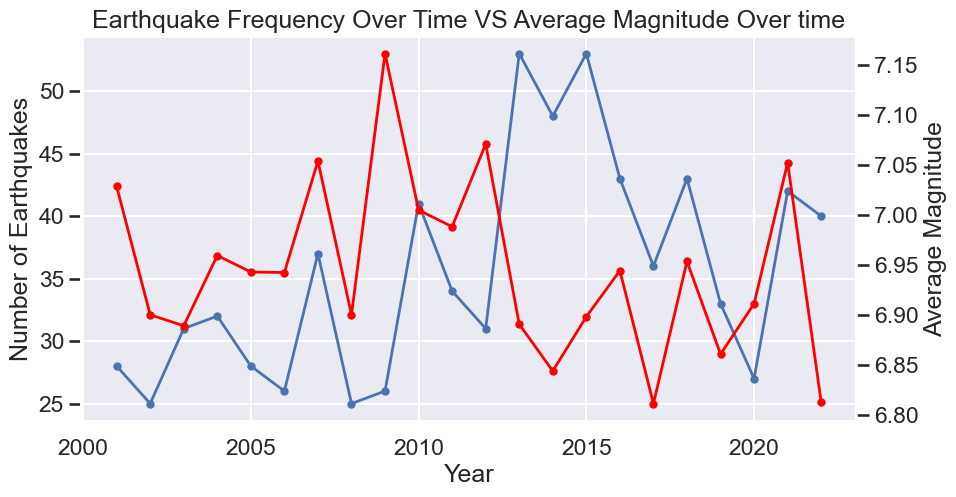

In [116]:
fig,ax1 = plt.subplots(figsize=(10,5))
ax1.plot(freq_per_year.index,freq_per_year.values,marker="o",linewidth=2,markersize=5)
ax1.set_xlabel('Year')
ax1.set_ylabel('Number of Earthquakes')
ax1.set_title("Earthquake Frequency Over Time VS Average Magnitude Over time")


ax2 = ax1.twinx()
ax2.plot(avg_magn_year.index,avg_magn_year.values,marker="o",color="red",linewidth=2,markersize=5)
ax2.set_xlabel('Year')
ax2.set_ylabel('Average Magnitude')
ax2.grid(False)

plt.show()

##### 2. Magnitude Over Month

In [ ]:
import calendar

avg_magnitude_by_month= data.groupby("Month")["magnitude"].mean()
earthquakes_count_by_month= data.groupby("Month")["Month"].value_counts()

month_list=[calendar.month_abbr[m] for m in avg_magnitude_by_month.index]

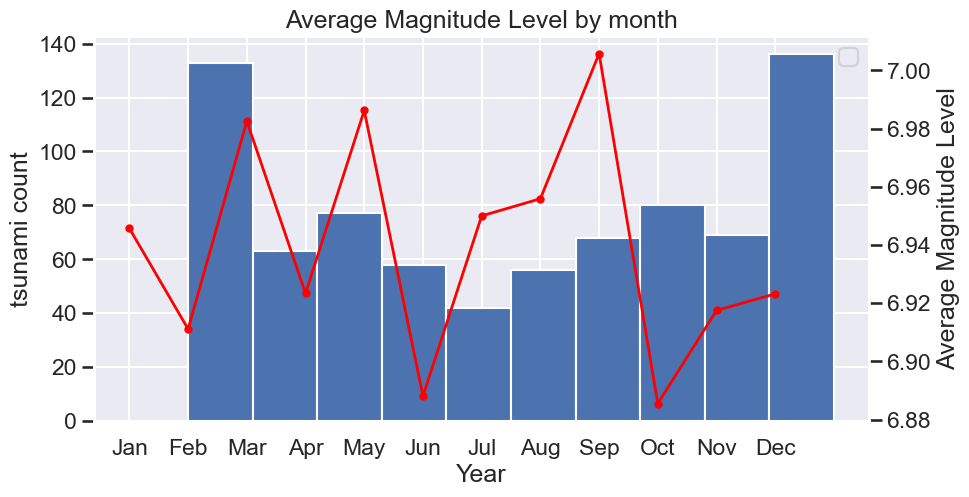

In [132]:

fig, ax1=plt.subplots(figsize=(10,5))
ax1.hist(data["Month"])
ax1.set_xlabel('Year')
ax1.set_ylabel('tsunami count')


ax2=ax1.twinx()
ax2.plot(month_list,avg_magnitude_by_month.values,marker="o",color="red",linewidth=2,markersize=5)
ax2.set_xlabel('Month')
ax2.set_ylabel('Average Magnitude Level')

ax2.set_title('Average Magnitude Level by month')
ax2.grid(False)

plt.legend()
plt.show()


#####  3. Yearly Tsunami Counts vs Earthquake Frequency

In [71]:
Tsunami_Count_Per_Year=data.groupby("Year")["tsunami"].sum()

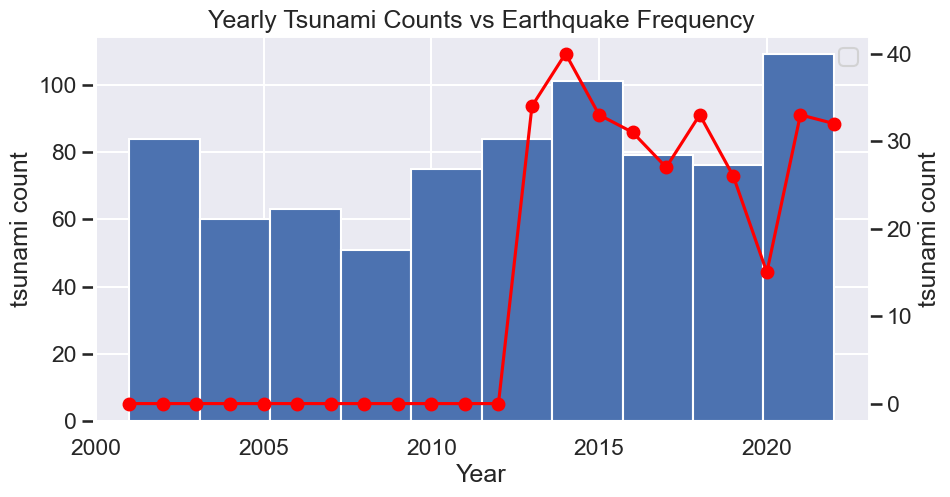

In [131]:
fig, ax1=plt.subplots(figsize=(10,5))
ax1.hist(data["Year"])
ax1.set_xlabel('Year')
ax1.set_ylabel('tsunami count')


ax2=ax1.twinx()
ax2.plot(Tsunami_Count_Per_Year.index,Tsunami_Count_Per_Year.values,marker="o",color="red")
ax2.set_xlabel('Year')
ax2.set_ylabel('tsunami count')
ax2.set_title("Yearly Tsunami Counts vs Earthquake Frequency")
ax2.grid(False)

plt.legend()
plt.show()

## 2. Magnitude and Depth Analysis:
##### 2.2 Analyze the distribution of earthquake magnitudes and depths.


Text(0.5, 1.0, 'depth Distribution plot')

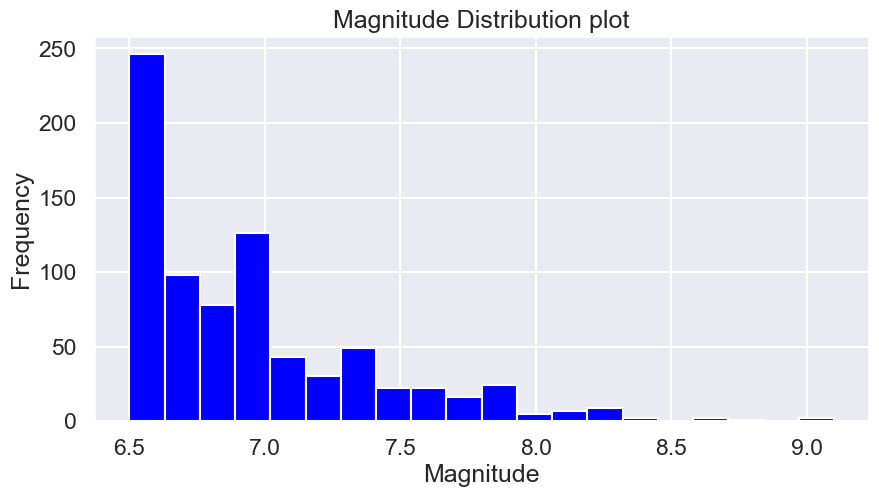

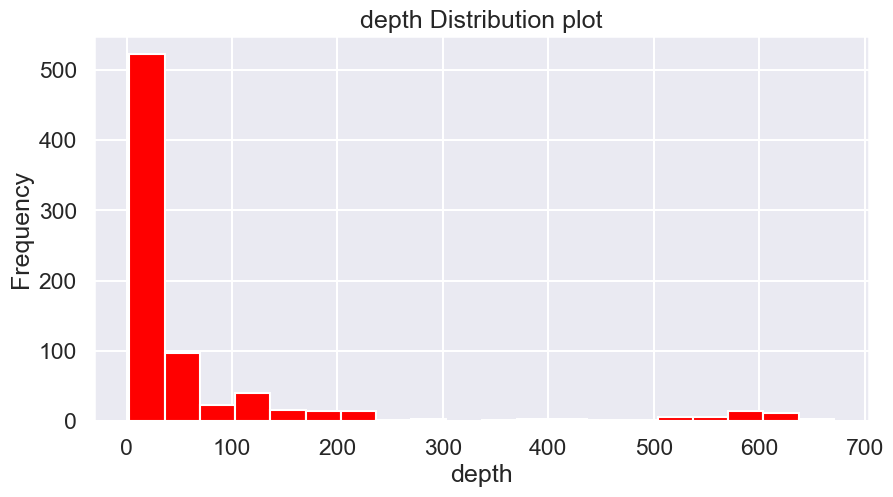

In [130]:
plt.figure(figsize=(10,5))
plt.hist(data["magnitude"],bins=20,color="blue")
plt.xlabel("Magnitude")
plt.ylabel("Frequency")
plt.title("Magnitude Distribution plot")

plt.figure(figsize=(10,5))
plt.hist(data["depth"],bins=20,color="red")
plt.xlabel("depth")
plt.ylabel("Frequency")
plt.title("depth Distribution plot")

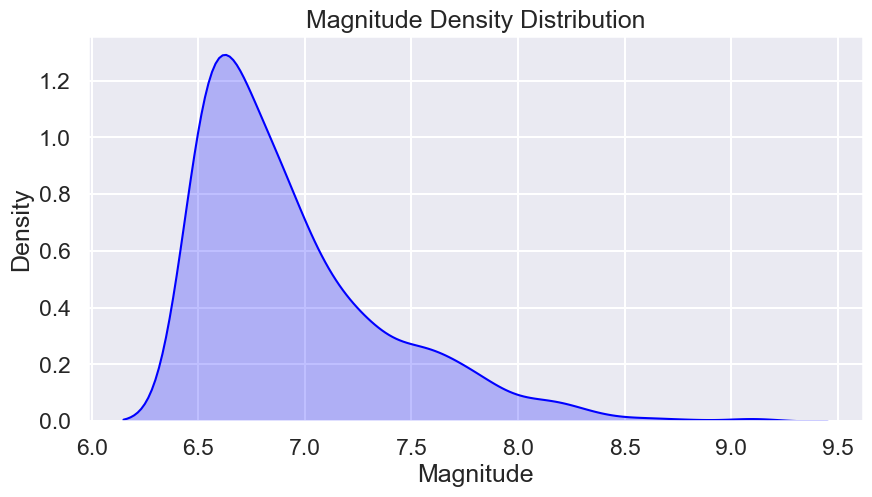

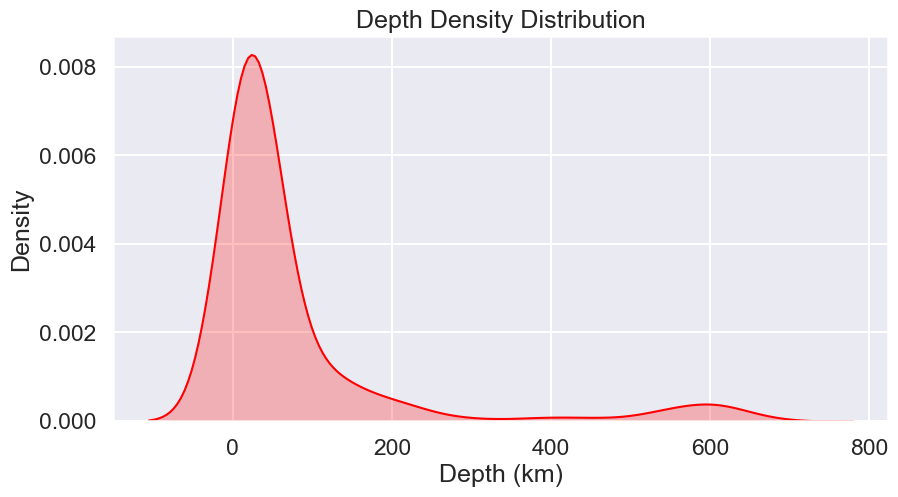

In [133]:
plt.figure(figsize=(10,5))
sns.kdeplot(data['magnitude'], shade=True, color='blue')
plt.title('Magnitude Density Distribution')
plt.xlabel('Magnitude')
plt.show()

plt.figure(figsize=(10,5))
sns.kdeplot(data['depth'], shade=True, color='red')
plt.title('Depth Density Distribution')
plt.xlabel('Depth (km)')
plt.show()

##### Compare the average magnitude and depth of tsunami vs. non-tsunami events.


In [140]:
avg_magnitude=data["magnitude"][data["tsunami"]==1].mean()
avg_magnitude_non=data["magnitude"][data["tsunami"]==0].mean()

avg_depth=data["depth"][data["tsunami"]==1].mean()
avg_depth_non=data["depth"][data["tsunami"]==0].mean()


In [141]:
print("Average Magnitude:")
print(f"Tsunami: {avg_magnitude:.2f}, Non-Tsunami: {avg_magnitude_non:.2f}")

print("\nAverage Depth (km):")
print(f"Tsunami: {avg_depth:.2f}, Non-Tsunami: {avg_depth_non:.2f}")

Average Magnitude:
Tsunami: 6.94, Non-Tsunami: 6.94

Average Depth (km):
Tsunami: 85.66, Non-Tsunami: 69.67


##### Highlight major earthquakes (≥8.0) and their characteristics.

In [143]:
major_eq=data[data["magnitude"]>=0.8]
major_eq[['Year', 'Month', 'magnitude', 'depth', 'latitude', 'longitude', 'tsunami']].head()

,Year,Month,magnitude,depth,latitude,longitude,tsunami
0,2022,11,7.0,14.000,-9.7963,159.596,1
1,2022,11,6.9,25.000,-4.9559,100.738,0
2,2022,11,7.0,579.000,-20.0508,-178.346,1
3,2022,11,7.3,37.000,-19.2918,-172.129,1
4,2022,11,6.6,624.464,-25.5948,178.278,1


In [144]:
print("Major Earthquake Statistics:")
print(major_eq[['magnitude', 'depth']].describe())

Major Earthquake Statistics:
        magnitude       depth
count  782.000000  782.000000
mean     6.941125   75.883199
std      0.445514  137.277078
min      6.500000    2.700000
25%      6.600000   14.000000
50%      6.800000   26.295000
75%      7.100000   49.750000
max      9.100000  670.810000


## 3. Geographic Distribution Using 2D Plotting:
##### Plot earthquake locations using latitude and longitude on a 2D scatter plot.


In [180]:
tsunami=data[["latitude","longitude"]][data["tsunami"]==1]
non_tsunami=data[["latitude","longitude"]][data["tsunami"]==0]

print(data["tsunami"].value_counts())

tsunami
0    478
1    304
Name: count, dtype: int64


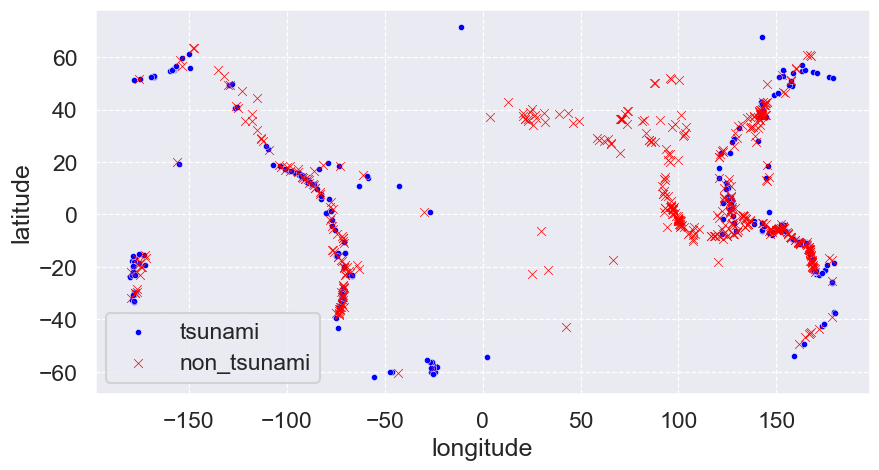

In [178]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=tsunami,y="latitude",x="longitude",marker="o",s=20,color="blue")
sns.scatterplot(data=non_tsunami,y="latitude",x="longitude",marker="x",s=40,color="red")
plt.legend(["tsunami","non_tsunami"])
plt.grid(linestyle="--",linewidth=0.9)

##### Visually distinguish between tsunami and non-tsunami events.


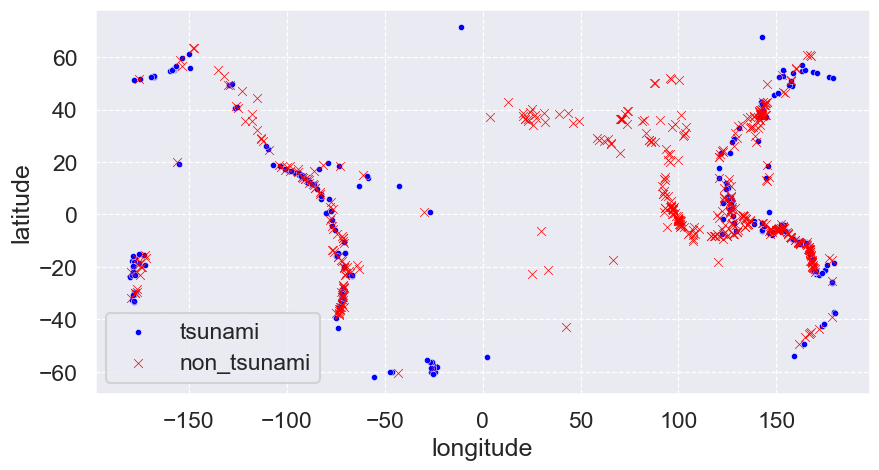

In [181]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=tsunami,y="latitude",x="longitude",marker="o",s=20,color="blue")
sns.scatterplot(data=non_tsunami,y="latitude",x="longitude",marker="x",s=40,color="red")
plt.legend(["tsunami","non_tsunami"])
plt.grid(linestyle="--",linewidth=0.9)

##### Identify clusters or regions with higher concentration of tsunami events (without using map tiles or interactive maps).

In [183]:
tsunami_data=data[data["tsunami"]==1]

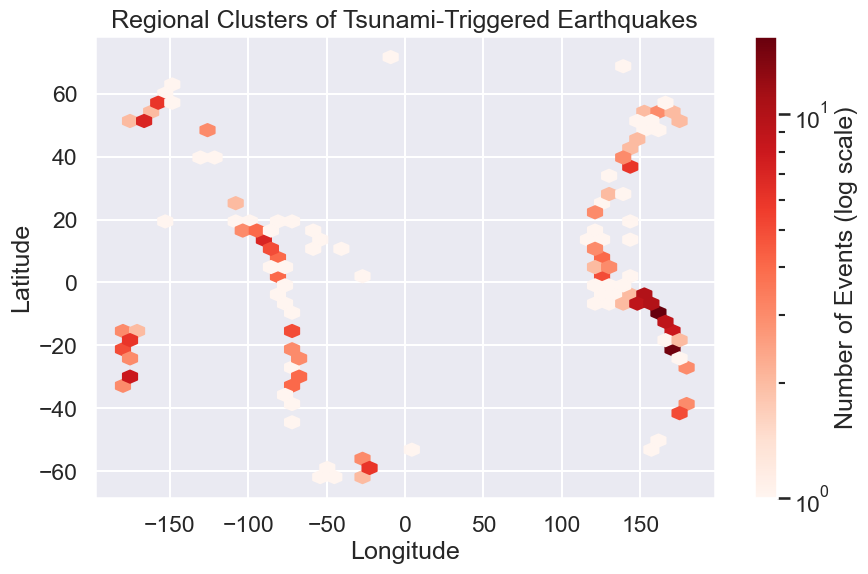

In [184]:
plt.figure(figsize=(10,6))
plt.hexbin(
    tsunami_data["longitude"], 
    tsunami_data["latitude"], 
    gridsize=40, 
    cmap="Reds", 
    bins="log"
)
plt.colorbar(label="Number of Events (log scale)")
plt.title("Regional Clusters of Tsunami-Triggered Earthquakes")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()


### 4. Statistical and Comparative Analysis:
##### Use box plots, histograms, and bar charts to compare seismic features between tsunami and non-tsunami events.


Text(0, 0.5, 'depth')

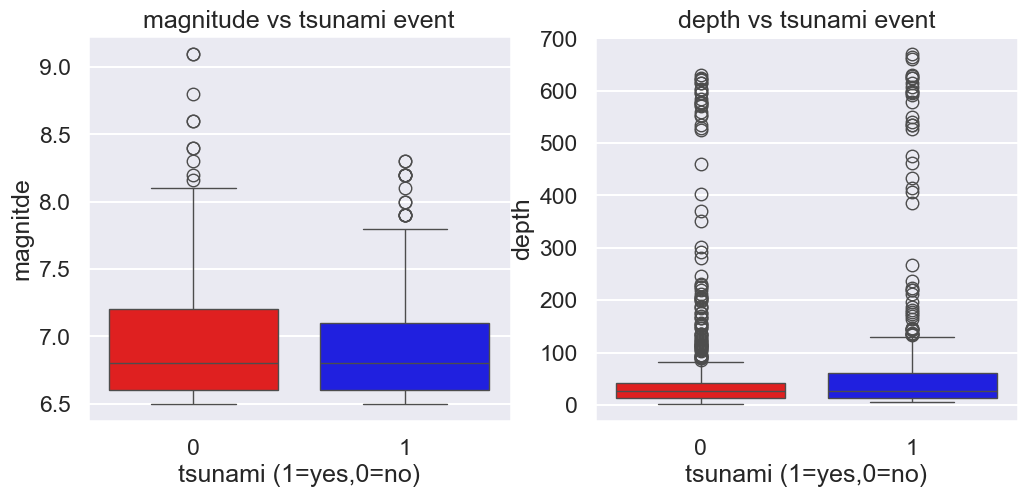

In [205]:
fig, axi = plt.subplots(1,2,figsize=(12,5))

sns.boxplot(data=data,x="tsunami",y="magnitude",ax=axi[0],palette=["red","blue"])
axi[0].set_title("magnitude vs tsunami event")
axi[0].set_xlabel("tsunami (1=yes,0=no)")
axi[0].set_ylabel("magnitde")


sns.boxplot(data=data,x="tsunami",y="depth",ax=axi[1],palette=["red","blue"])
axi[1].set_title("depth vs tsunami event")
axi[1].set_xlabel("tsunami (1=yes,0=no)")
axi[1].set_ylabel("depth")


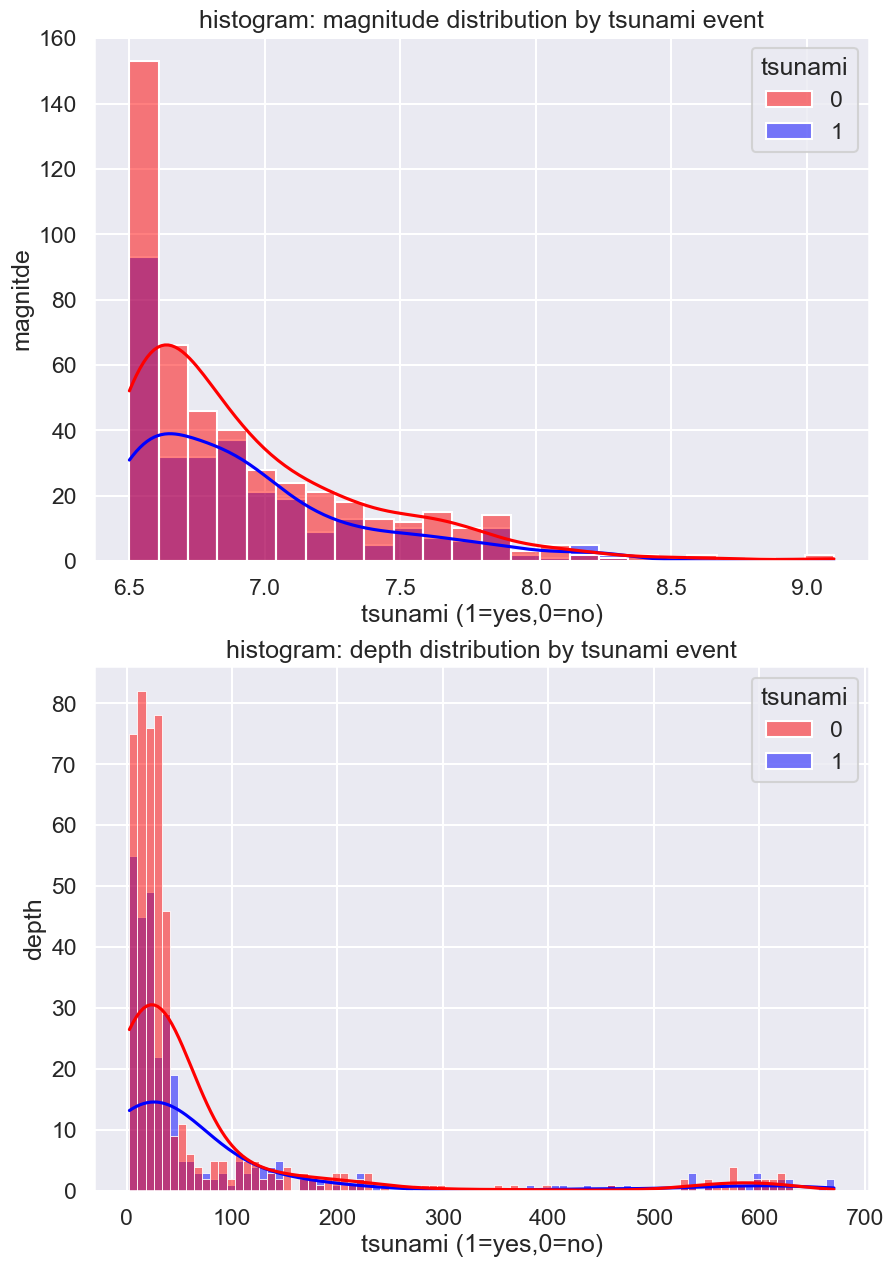

In [229]:
fig, axi = plt.subplots(2,1,figsize=(10,15))

sns.histplot(data=data,x="magnitude",ax=axi[0],palette=["red","blue"],kde=True,hue="tsunami")
axi[0].set_title("histogram: magnitude distribution by tsunami event")
axi[0].set_xlabel("tsunami (1=yes,0=no)")
axi[0].set_ylabel("magnitde")


sns.histplot(data=data,x="depth",ax=axi[1],palette=["red","blue"],kde=True,hue="tsunami")
axi[1].set_title("histogram: depth distribution by tsunami event")
axi[1].set_xlabel("tsunami (1=yes,0=no)")
axi[1].set_ylabel("depth")

plt.show()

##### Analyze correlations between variables using heatmaps.

In [230]:
corr=data.corr()
corr

,magnitude,cdi,mmi,sig,nst,dmin,gap,depth,latitude,longitude,Year,Month,tsunami
magnitude,1.000000,0.209549,0.285552,0.515871,0.113114,-0.091403,-0.110626,0.030644,-0.008552,-0.013911,-0.057083,-0.011926,-0.004726
cdi,0.209549,1.000000,0.317937,0.479788,-0.175417,0.006554,0.098143,-0.097891,0.129003,-0.149048,0.423158,0.007002,0.160266
mmi,0.285552,0.317937,1.000000,0.442423,0.160417,-0.299074,-0.015723,-0.504439,0.144883,-0.005803,-0.212855,-0.035238,-0.147363
sig,0.515871,0.479788,0.442423,1.000000,-0.030100,-0.095318,0.114285,-0.088667,0.204306,-0.190132,0.124439,-0.029189,-0.015500
nst,0.113114,-0.175417,0.160417,-0.030100,1.000000,-0.529371,-0.118812,-0.121982,0.144204,0.173665,-0.688602,-0.014021,-0.600231
dmin,-0.091403,0.006554,-0.299074,-0.095318,-0.529371,1.000000,-0.021933,0.168546,-0.238377,-0.097875,0.529449,0.037502,0.400752
gap,-0.110626,0.098143,-0.015723,0.114285,-0.118812,-0.021933,1.000000,-0.111912,0.087756,-0.313623,0.194002,-0.024953,0.116360
depth,0.030644,-0.097891,-0.504439,-0.088667,-0.121982,0.168546,-0.111912,1.000000,-0.069492,-0.036986,0.178220,0.069213,0.056814
latitude,-0.008552,0.129003,0.144883,0.204306,0.144204,-0.238377,0.087756,-0.069492,1.000000,0.026927,-0.089731,-0.057292,-0.113209
longitude,-0.013911,-0.149048,-0.005803,-0.190132,0.173665,-0.097875,-0.313623,-0.036986,0.026927,1.000000,-0.187947,0.028047,-0.136778


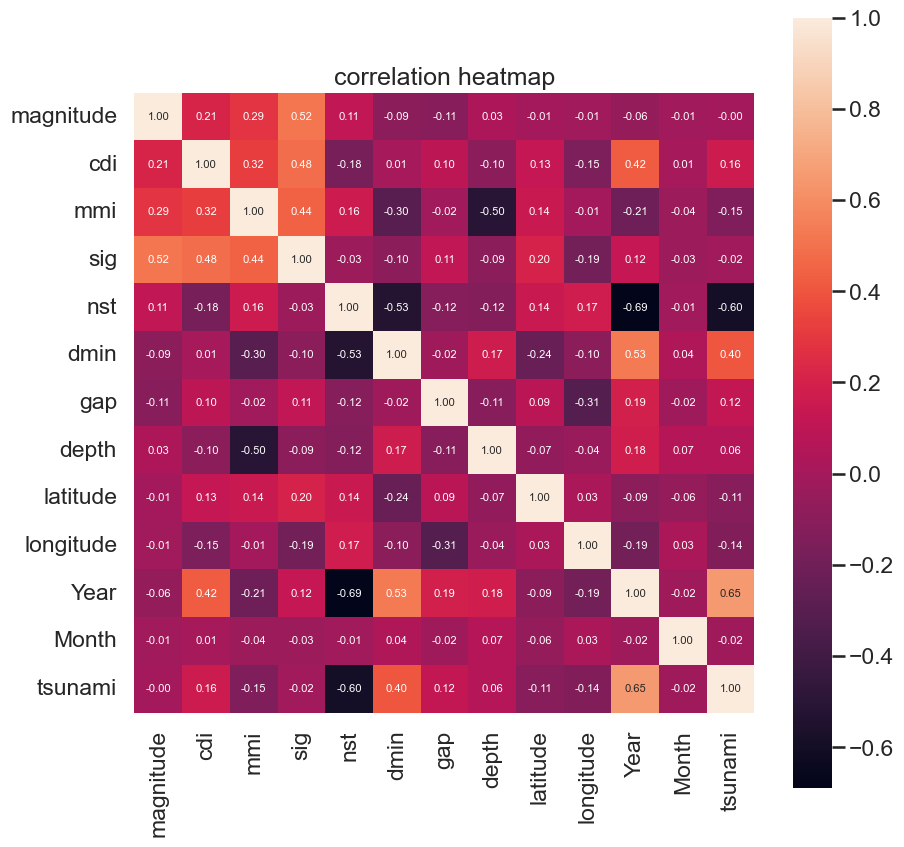

In [243]:
plt.figure(figsize=(10,10))
sns.heatmap(corr,annot=True,square=True,fmt=".2f",annot_kws={"size": 8})
plt.title("correlation heatmap")
plt.show()

## 5. Insights and Observations:
##### Summarize key differences in seismic behavior between tsunami and non-tsunami earthquakes.


In [234]:
print(f"total events: {len(data)}")
print(f"tsunami events: {len(tsunami)}")
print(f"non tsunami events: {len(non_tsunami)}")

total events: 782
tsunami events: 304
non tsunami events: 478


In [235]:
ts_mean=data["magnitude"][data["tsunami"]==1].mean()
non_ts_mean=data["magnitude"][data["tsunami"]==0].mean()

print(f"mean magnitude of tsunami events: {ts_mean}")
print(f"mean magnitude of tsunami events: {non_ts_mean}")

mean magnitude of tsunami events: 6.938486842105264
mean magnitude of tsunami events: 6.942803347280335


### A. Key Differences in Seismic Behavior

##### 1.Magnitude Differences

##### 1.1 Tsunami-triggering earthquakes generally show higher magnitudes, often ≥6.5, compared to non-tsunami events which mostly cluster between 4.0–6.0.

##### 1.2 Boxplots and histograms reveal a right-skewed distribution for tsunami magnitudes — indicating more powerful events in that group.

##### 2.Depth Differences

##### 2.1 Tsunami events are typically shallower, commonly occurring at depths <50 km.

##### 2.2 Non-tsunami earthquakes occur across a wider depth range, including many deep-focus (>300 km) events that rarely generate tsunamis.

##### 3.Frequency and Distribution

##### 3.1 Non-tsunami events are far more frequent overall.

##### 3.2 Tsunami events are clustered geographically around subduction zones (e.g., Japan Trench, Indonesian Arc, Chile–Peru region), suggesting tectonic setting is a key factor.

##### 4.Variability

##### 4.1 Tsunami-related quakes show less variability in both depth and magnitude compared to non-tsunami quakes — indicating they occur within a more specific seismic profile (large and shallow).